# Student Performance – Exploratory Data Analysis (EDA)

Este notebook realiza uma análise exploratória dos dados de desempenho de estudantes
armazenados em um banco de dados PostgreSQL.

**Objetivos:**
- Entender a distribuição das notas.
- Analisar a performance por disciplina.
- Identificar os estudantes com melhor desempenho.
- Investigar possíveis padrões por idade e gênero.

**Stack utilizada:**
- PostgreSQL
- Python (pandas, matplotlib)
- Projeto: `student-performance-analytics`


In [6]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt

# Garantir que a raiz do projeto está no sys.path
PROJECT_ROOT = os.path.dirname(os.getcwd())
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("PROJECT_ROOT:", PROJECT_ROOT)

from database.database import get_connection
from database.queries import get_all_students

# configs de plot
plt.style.use("default")


PROJECT_ROOT: /home/l-faria/workspaces/student-performance-analytics


## 1. Carregando os dados do PostgreSQL


In [9]:
students = get_all_students()
print(f"Total de estudantes carregados: {len(students)}")

df = pd.DataFrame([s.__dict__ for s in students])
df.head()

Total de estudantes carregados: 2


,student_id,name,age,gender,subject,marks
0,2,Maria,27,Female,C,87
1,3,Raul,30,Male,Data Analysis,98


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  2 non-null      int64 
 1   name        2 non-null      object
 2   age         2 non-null      int64 
 3   gender      2 non-null      object
 4   subject     2 non-null      object
 5   marks       2 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 228.0+ bytes


## 2. Visão geral das notas

Aqui analisamos:
- quantidade de registros
- estatísticas básicas das notas
- distribuição das notas


In [11]:
df['marks'].describe()


count     2.000000
mean     92.500000
std       7.778175
min      87.000000
25%      89.750000
50%      92.500000
75%      95.250000
max      98.000000
Name: marks, dtype: float64

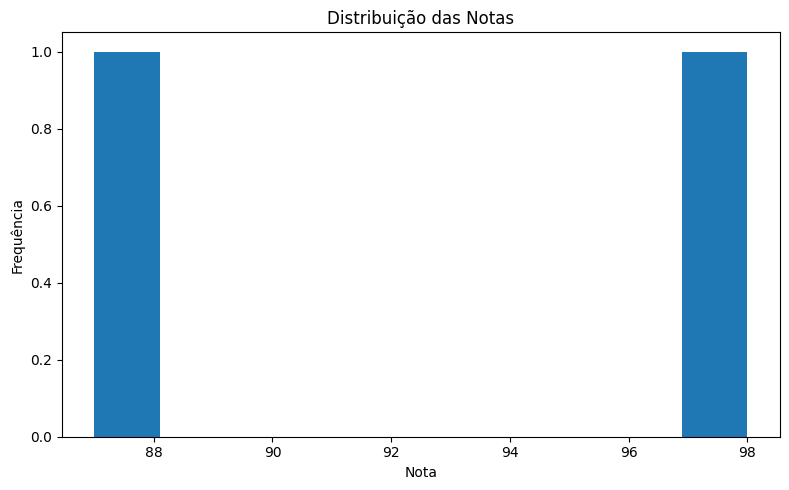

In [12]:
plt.figure(figsize=(8, 5))
df['marks'].plot(kind='hist', bins=10)
plt.title("Distribuição das Notas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


## 3. Performance por disciplina

Perguntas:
- Quais disciplinas têm maior média de notas?
- Existe alguma disciplina com performance claramente abaixo das outras?


In [13]:
avg_by_subject = df.groupby('subject')['marks'].mean().round(2).sort_values(ascending=False)
avg_by_subject


subject
Data Analysis    98.0
C                87.0
Name: marks, dtype: float64

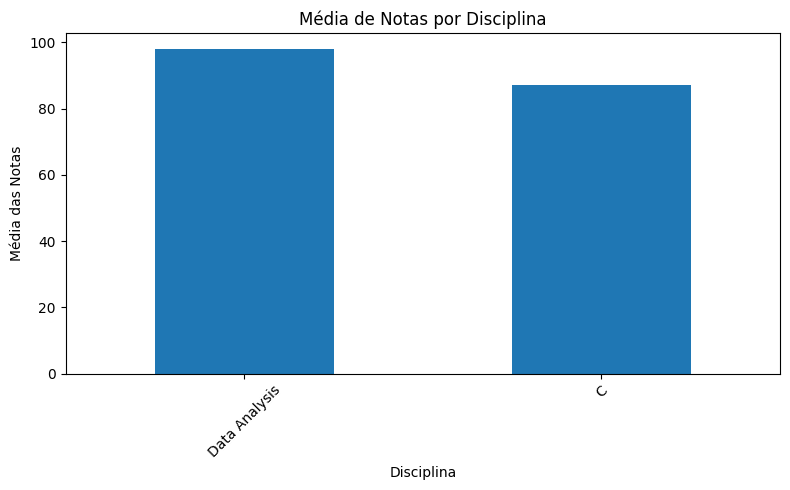

In [14]:
plt.figure(figsize=(8, 5))
avg_by_subject.plot(kind='bar')
plt.title("Média de Notas por Disciplina")
plt.xlabel("Disciplina")
plt.ylabel("Média das Notas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Distribuição por gênero

Se o campo `gender` estiver preenchido, podemos analisar se há diferenças de performance
entre gêneros.


In [15]:
df['gender'].value_counts()


gender
Female    1
Male      1
Name: count, dtype: int64

In [16]:
avg_by_gender = df.groupby('gender')['marks'].mean().round(2)
avg_by_gender


gender
Female    87.0
Male      98.0
Name: marks, dtype: float64

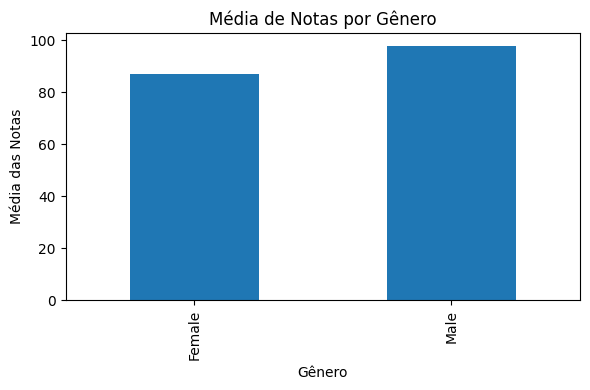

In [17]:
plt.figure(figsize=(6, 4))
avg_by_gender.plot(kind='bar')
plt.title("Média de Notas por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Média das Notas")
plt.tight_layout()
plt.show()


## 5. Top estudantes

Aqui identificamos os estudantes com melhor desempenho geral.


In [18]:
top_n = 5
top_students = df.sort_values(by='marks', ascending=False).head(top_n)
top_students


,student_id,name,age,gender,subject,marks
1,3,Raul,30,Male,Data Analysis,98
0,2,Maria,27,Female,C,87


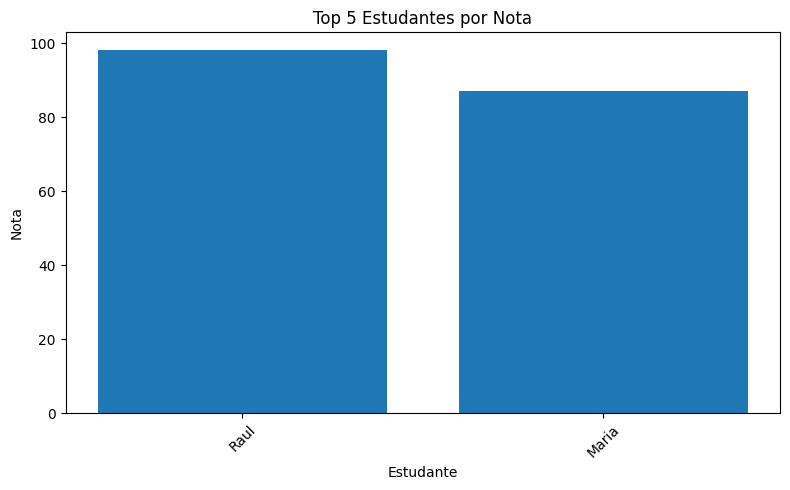

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(top_students['name'], top_students['marks'])
plt.title(f"Top {top_n} Estudantes por Nota")
plt.xlabel("Estudante")
plt.ylabel("Nota")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Relação entre idade e notas

Aqui verificamos se há alguma tendência de notas por idade.


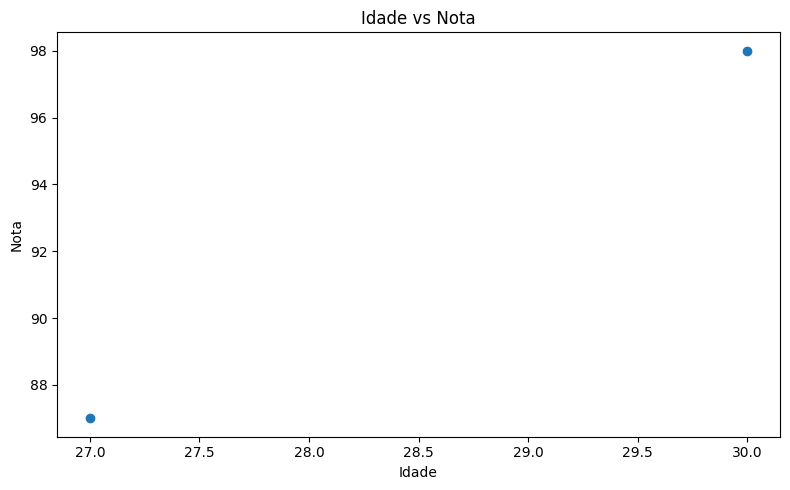

age
27    87.0
30    98.0
Name: marks, dtype: float64

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['marks'])
plt.title("Idade vs Nota")
plt.xlabel("Idade")
plt.ylabel("Nota")
plt.tight_layout()
plt.show()

df.groupby('age')['marks'].mean().round(2)


## 7. Conclusões

**Resumo dos principais insights:**

- A média geral de notas é de aproximadamente `X` pontos.
- A disciplina com melhor desempenho médio é **Y** e a com pior desempenho é **Z**.
- A variação por gênero é (pequena / significativa / inexistente) nos dados atuais.
- Os top estudantes atingem notas próximas de `A` pontos.
- A relação entre idade e notas parece (fraca / moderada / inexistente) visualmente.

> Observação: estes dados são fictícios / de exemplo, mas a estrutura do projeto
> demonstra um fluxo completo de:
> PostgreSQL → Python (camada de dados) → Analytics → Notebook com visualização.
